# 互评作业3: 分类、预测与聚类--3220200920刘晓晨
Github地址：https://github.com/LiuXiaochen-0920/Data-Mining

## 作业说明
### 1. 问题描述
本次作业中，将从下面的3个问题中任选一个进行。

### 2. 数据集
所选数据集为：<br>  
* [Hotel booking demand](https://www.kaggle.com/jessemostipak/hotel-booking-demand)

* 该数据集包含城市酒店和度假酒店的预订信息，包括预订时间、停留时间，成人/儿童/婴儿人数以及可用停车位数量等信息。  
* 数据量：32列共12W数据。

### 3. 探索
基于这个数据集，可进行以下问题的探索：

* 基本情况：城市酒店和假日酒店预订需求和入住率比较；
* 用户行为：提前预订时间、入住时长、预订间隔、餐食预订情况；
* 一年中最佳预订酒店时间；
* 利用Logistic预测酒店预订。

## 一、数据集预处理

In [24]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', 500)

In [25]:
# 载入数据
hotel= pd.read_csv("./input/hotel_bookings.csv")
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [26]:
print(hotel.shape)

(119390, 32)


In [27]:
# 数据概括
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [28]:
# 查看数据类型
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

数据集有32个变量,和一个确定的因变量(分类的is_cancelled)。

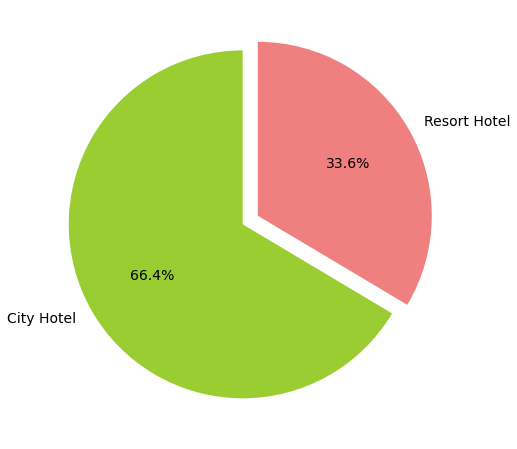

In [29]:
# 饼图
plt.rcParams['figure.figsize'] = 8,8
# 索引标签。为了便于操作，Tolist()将索引转换为列表
labels = hotel['hotel'].value_counts().index.tolist()
# 将值计数转换为列表
sizes = hotel['hotel'].value_counts().tolist()
explode = (0, 0.1)
# 颜色
colors = ['yellowgreen', 'lightcoral']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()

* 我们可以看到City hotel的比例比Resort hotel要高。
* Resort hotel往往比较贵，大多数人只会选择City hotel。

## 二、数据清洗

In [30]:
# 检查缺失数据
hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [31]:
# 化成百分比
print(round(100*(hotel.isnull().sum()/len(hotel.index)),2))

hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.41
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.69
company                           94.31


数据集中包含缺失数值，我们可以删除缺失率很高、不必要的列。Country有488行具有NaN值。119390中的488行是可以忽略的，因此我们将移除。

In [32]:
hotel=hotel.drop(['agent','company'],axis=1)

In [33]:
# 按行删除
hotel = hotel.dropna(axis = 0)
hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [34]:
# 对列重新命名
hotel.columns = ['Hotel', 'Canceled', 'LeadTime', 'ArrivingYear', 'ArrivingMonth', 'ArrivingWeek','ArrivingDate', 'WeekendStay',
              'WeekStay', 'Adults', 'Children', 'Babies', 'Meal','Country', 'Segment', 'DistChannel','RepeatGuest', 'PrevCancel',
              'PrevBook', 'BookRoomType','AssignRoomType', 'ChangeBooking', 'DepositType', 'WaitingDays', 
              'CustomerType', 'ADR','ParkSpace', 'SpecialRequest','Reservation', 'ReservationDate']

In [38]:
# 识别数值属性和标称属性
def var(hotel):
    unique_list = pd.DataFrame([[i,len(hotel[i].unique())] for i in hotel.columns])
    unique_list.columns = ['name','uniques']

    total_var = set(hotel.columns)
    cat_var = set(unique_list.name[(unique_list.uniques<=12)      | 
                                   (unique_list.name=='Country')  | 
                                   (unique_list.name=='Agent')                                     
                                  ])
    con_var = total_var - cat_var
    
    return cat_var, con_var 


cat_var, con_var = var(hotel)

print("Continuous Variables (",len(con_var),")\n",con_var,'\n\n'
      "Categorical Variables(",len(cat_var),")\n",cat_var)

Continuous Variables ( 12 )
 {'LeadTime', 'ADR', 'PrevBook', 'PrevCancel', 'WeekendStay', 'ReservationDate', 'WaitingDays', 'ChangeBooking', 'ArrivingWeek', 'Adults', 'WeekStay', 'ArrivingDate'} 

Categorical Variables( 18 )
 {'Canceled', 'ParkSpace', 'Children', 'Reservation', 'DistChannel', 'Segment', 'Meal', 'AssignRoomType', 'Babies', 'Hotel', 'RepeatGuest', 'BookRoomType', 'CustomerType', 'ArrivingYear', 'DepositType', 'Country', 'SpecialRequest', 'ArrivingMonth'}


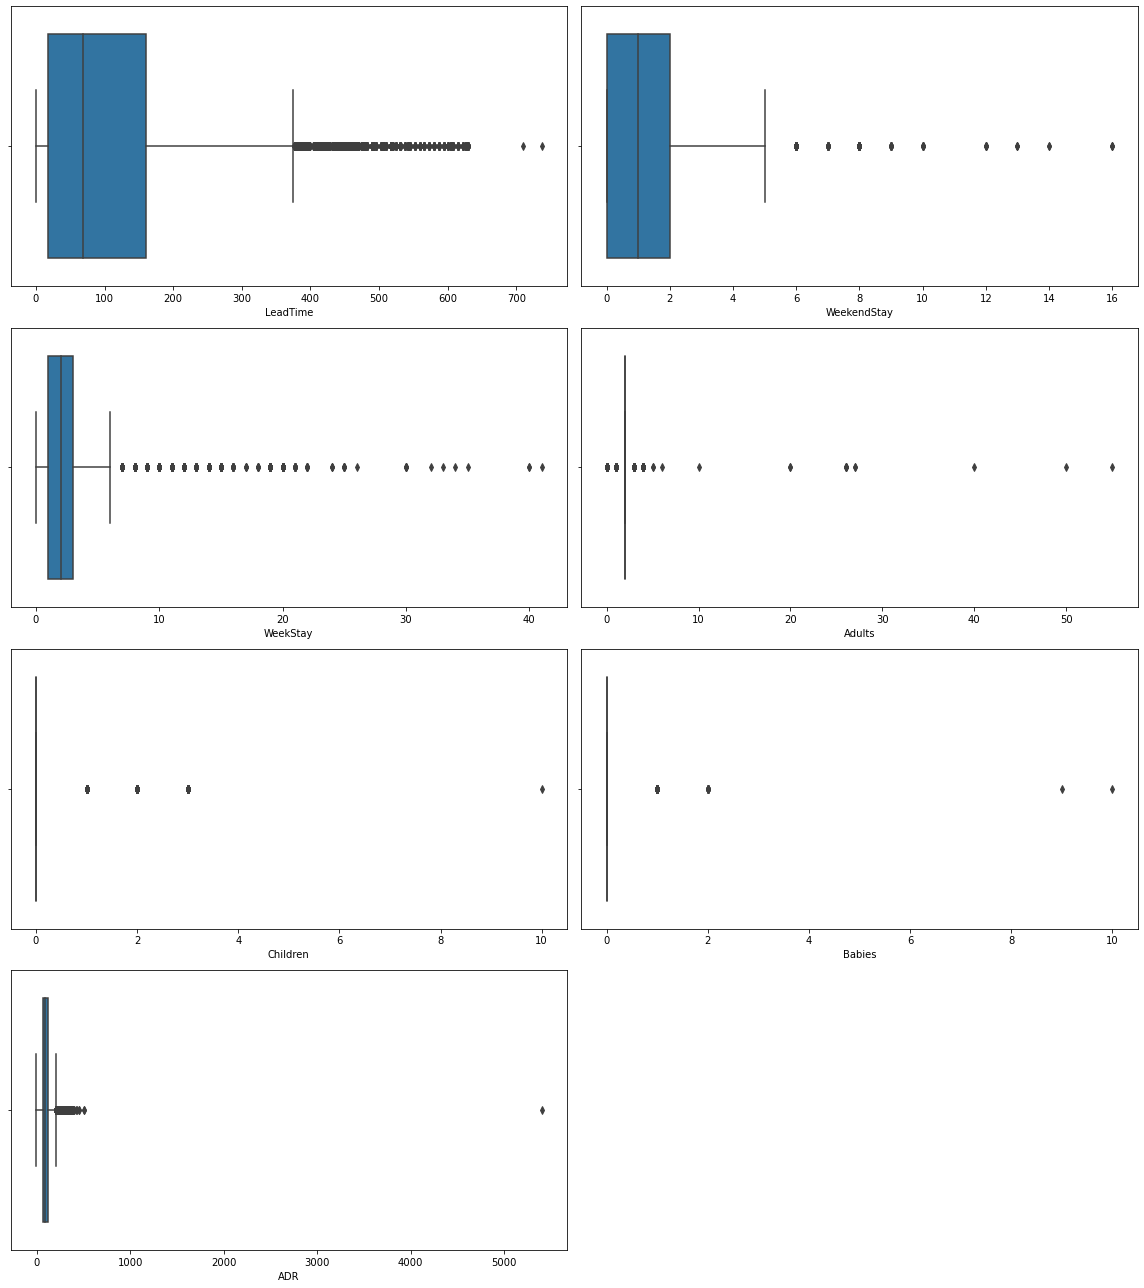

In [44]:
# 检查离群点--盒图
features = ['LeadTime', 'WeekendStay', 'WeekStay', 'Adults','Children', 'Babies','ADR']
n = 1
plt.figure(figsize=(16,18))
for feature in features:
    plt.subplot(4,2,n)
    sns.boxplot(hotel[feature])
    n+=1
    plt.tight_layout()

In [45]:
# 数值属性
hotel[con_var].describe()

,LeadTime,ADR,PrevBook,PrevCancel,WeekendStay,WaitingDays,ChangeBooking,ArrivingWeek,Adults,WeekStay,ArrivingDate
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,104.311435,102.003243,0.131634,0.087142,0.928897,2.330754,0.221181,27.166555,1.858391,2.502145,15.800880
std,106.903309,50.485862,1.484672,0.845869,0.996216,17.630452,0.652785,13.589971,0.578576,1.900168,8.780324
min,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,18.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,2.000000,1.000000,8.000000
50%,69.000000,95.000000,0.000000,0.000000,1.000000,0.000000,0.000000,28.000000,2.000000,2.000000,16.000000
75%,161.000000,126.000000,0.000000,0.000000,2.000000,0.000000,0.000000,38.000000,2.000000,3.000000,23.000000
max,737.000000,5400.000000,72.000000,26.000000,16.000000,391.000000,21.000000,53.000000,55.000000,41.000000,31.000000


通过汇总统计确定有离群值的数值属性列表是
* LeadTime
* WaitingDays
* WeekendStay
* Adults
* PrevBook
* PrevCancel
* WeekStay

数值属性中应该是标称属性的为：
* PrevBook
* PrevCancel

In [47]:
# 导出离群点
hotel.loc[hotel.LeadTime      > 500,'LeadTime'     ]=500
hotel.loc[hotel.WaitingDays   >   0,'WaitingDays'  ]=  1
hotel.loc[hotel.WeekendStay   >=  5,'WeekendStay'  ]=  5
hotel.loc[hotel.Adults        >   4,'Adults'       ]=  4
hotel.loc[hotel.PrevBook      >   0,'PrevBook'     ]=  1
hotel.loc[hotel.PrevCancel    >   0,'PrevCancel'   ]=  1
hotel.loc[hotel.WeekStay      >  10,'WeekStay'     ]= 10
hotel.loc[hotel.ChangeBooking >   5,'ChangeBooking']=  5

cat_var = set(list(cat_var) + ['PrevBook','PrevCancel'])
con_var = set(hotel.columns) - cat_var

hotel[con_var].describe()

,LeadTime,ADR,WeekendStay,WaitingDays,ChangeBooking,ArrivingWeek,Adults,WeekStay,ArrivingDate
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,104.054543,102.003243,0.924187,0.031102,0.217237,27.166555,1.855607,2.481581,15.800880
std,105.834923,50.485862,0.967762,0.173595,0.602693,13.589971,0.488194,1.760766,8.780324
min,0.000000,-6.380000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,18.000000,70.000000,0.000000,0.000000,0.000000,16.000000,2.000000,1.000000,8.000000
50%,69.000000,95.000000,1.000000,0.000000,0.000000,28.000000,2.000000,2.000000,16.000000
75%,161.000000,126.000000,2.000000,0.000000,0.000000,38.000000,2.000000,3.000000,23.000000
max,500.000000,5400.000000,5.000000,1.000000,5.000000,53.000000,4.000000,10.000000,31.000000


In [48]:
# 标称属性中离群点
hotel[cat_var].describe()

,Canceled,Children,ArrivingYear,ParkSpace,PrevBook,PrevCancel,Babies,RepeatGuest,SpecialRequest
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,0.104207,2016.157656,0.061885,0.028571,0.054223,0.007948,0.032011,0.571683
std,0.483168,0.399172,0.707459,0.244172,0.166597,0.226458,0.097380,0.176029,0.792678
min,0.000000,0.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,2017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,10.000000,2017.000000,8.000000,1.000000,1.000000,10.000000,1.000000,5.000000


In [49]:
hotel.loc[hotel.Babies    > 8,'Babies']    = 0
hotel.loc[hotel.ParkSpace > 5,'ParkSpace'] = 0
hotel.loc[hotel.Children  > 8,'Children']  = 0

hotel[cat_var].describe()

,Canceled,Children,ArrivingYear,ParkSpace,PrevBook,PrevCancel,Babies,RepeatGuest,SpecialRequest
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,0.104123,2016.157656,0.061750,0.028571,0.054223,0.007788,0.032011,0.571683
std,0.483168,0.398139,0.707459,0.241992,0.166597,0.226458,0.089236,0.176029,0.792678
min,0.000000,0.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,2017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,2017.000000,3.000000,1.000000,1.000000,2.000000,1.000000,5.000000


## 三、数据准备

In [51]:
#先把孩子和婴儿结合在一起
hotel['Kids'] = hotel.Children + hotel.Babies
#把孩子和成人所有的数字加起来
hotel['total_members'] = hotel.Kids + hotel.Adults

In [53]:
#将数据类型转换为字符串
hotel['ArrivingYear'] = hotel['ArrivingYear'].astype('str')
hotel['ArrivingMonth'] = hotel['ArrivingMonth'].astype('str')
hotel['ArrivingDate'] = hotel['ArrivingDate'].astype('str')

hotel['Canceled'] = hotel['Canceled'].astype('str')
hotel['RepeatGuest'] = hotel['RepeatGuest'].astype('str')

In [54]:
# 将到达日期转换为日期时间
hotel['Arrival Date'] = hotel['ArrivingDate'] + '-' + hotel['ArrivingMonth'] + '-' + hotel['ArrivingYear']
hotel['Arrival Date'] = pd.to_datetime(hotel['Arrival Date'], errors='coerce')

In [55]:
confirmed_bookings = hotel[hotel.Canceled=='0']

In [56]:
import datetime as dt
confirmed_bookings['ArrivingMonth'] = hotel['Arrival Date'].dt.month
final=confirmed_bookings['ArrivingMonth'].value_counts().sort_index()
final

1     4068
2     5317
3     6591
4     6533
5     7102
6     6393
7     7892
8     8618
9     6367
10    6867
11    4632
12    4365
Name: ArrivingMonth, dtype: int64

## 四、探索性数据分析EDA

### 取消率

In [58]:
print('Total Bookings canceled')
print('-'*50)
print(hotel.Canceled.value_counts())
print('-'*50)
print('*'*75)
print('Cancelation percentage in both hotels ')
print('-'*50)
print(hotel.Canceled.value_counts(normalize=True))

Total Bookings canceled
--------------------------------------------------
0    74745
1    44153
Name: Canceled, dtype: int64
--------------------------------------------------
***************************************************************************
Cancelation percentage in both hotels 
--------------------------------------------------
0    0.628648
1    0.371352
Name: Canceled, dtype: float64


44153个预订被取消，约为37%

### 国家

In [59]:
hotel.Country.value_counts(normalize=True)

PRT    0.408636
GBR    0.102012
FRA    0.087596
ESP    0.072062
DEU    0.061288
         ...   
NAM    0.000008
BHS    0.000008
DJI    0.000008
MDG    0.000008
DMA    0.000008
Name: Country, Length: 177, dtype: float64

约40%的预订来自葡萄牙，其次是英国(10%)和法国(8%)。

### 月份

In [61]:
hotel.ArrivingMonth.value_counts(normalize=True)

August       0.116503
July         0.106209
May          0.099068
October      0.093315
April        0.092895
June         0.091902
September    0.088033
March        0.081911
February     0.067385
November     0.056788
December     0.056586
January      0.049404
Name: ArrivingMonth, dtype: float64

8月是最繁忙的月份，有11.62%的预订，1月是空置最多的月份，仅有4.96%的预订。

### 市场细分

In [62]:
hotel.Segment.value_counts(normalize=True)

Online TA        0.474373
Offline TA/TO    0.203199
Groups           0.166580
Direct           0.104695
Corporate        0.042986
Complementary    0.006173
Aviation         0.001993
Name: Segment, dtype: float64

约47%的预订量是通过在线旅行社完成的，近20%的预订量是通过线下旅行社完成的，只有不到20%的预订量是在没有任何其他代理商的情况下直接完成的。

### 年份

In [63]:
hotel.ArrivingYear.value_counts(normalize=True)

2016    0.474651
2017    0.341503
2015    0.183847
Name: ArrivingYear, dtype: float64

2016年预订率为47%，2017年为34%，2015年为18%。我们可以看到预订逐年增加的趋势

### 餐食

In [64]:
hotel.Meal.value_counts(normalize=True)

BB           0.772620
HB           0.121398
SC           0.089472
Undefined    0.009798
FB           0.006712
Name: Meal, dtype: float64

在膳食中，BB(Bed & Breakfast)是最常点的一餐，约为77.2%，其次是HB(Half Board)，SC(no meal package)，Undefined和FB(Full Board)。

### 顾客类型

In [65]:
hotel.CustomerType.value_counts(normalize=True)

Transient          0.750004
Transient-Party    0.210920
Contract           0.034281
Group              0.004794
Name: CustomerType, dtype: float64

暂时类型的客户更多，大约75%

In [66]:
hotel.Reservation.value_counts(normalize=True)

Check-Out    0.628648
Canceled     0.361234
No-Show      0.010118
Name: Reservation, dtype: float64

我们可以看到63%的游客退房，36%的预订被取消

## 五、数据可视化

Text(0.5, 1.0, 'Arriving year, Leadtime and Cancelations')

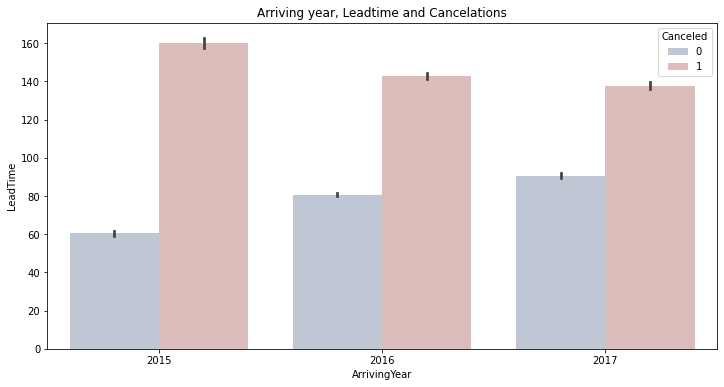

In [67]:
plt.figure(figsize=(12,6))
sns.barplot(x='ArrivingYear', y='LeadTime',hue='Canceled', data= hotel, palette='vlag')
plt.title('Arriving year, Leadtime and Cancelations')

在这3年里，预定时间少于100天的订单被取消的机会更少，预定时间超过100天的订单被取消的机会更多。

<AxesSubplot:>

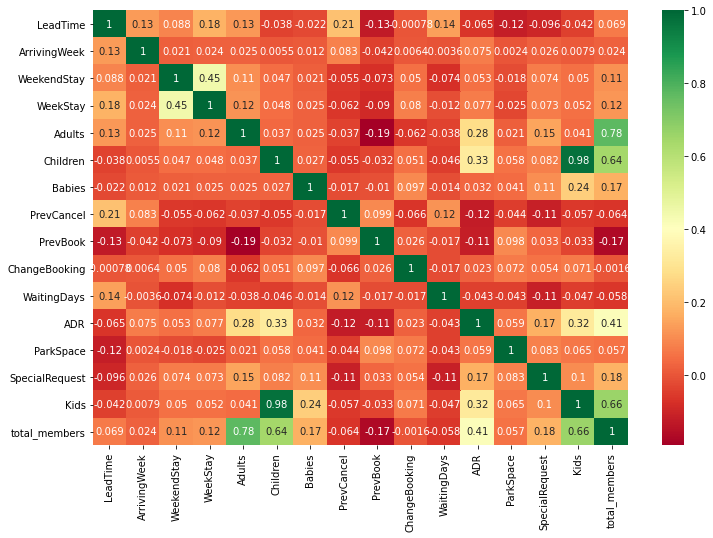

In [68]:
# 相关性分析
plt.figure(figsize=(12,8))
sns.heatmap(hotel.corr(),annot=True,cmap='RdYlGn')

### 取消

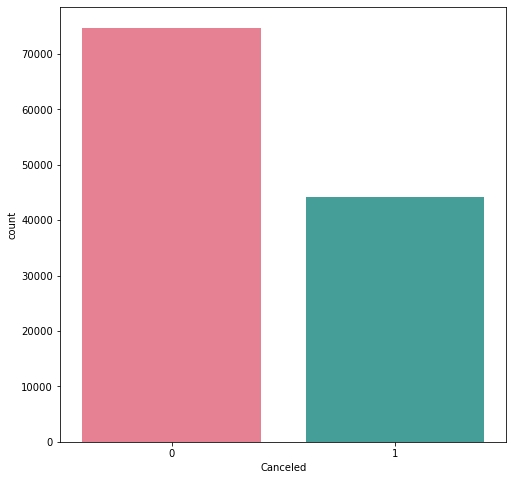

In [69]:
#Canceled=1, Not canceled= 0
canceled_data = hotel['Canceled']
sns.countplot(canceled_data, palette='husl')
plt.show()

大多数预订没有被取消，但仍有一半的预订被取消了

<AxesSubplot:ylabel='Canceled'>

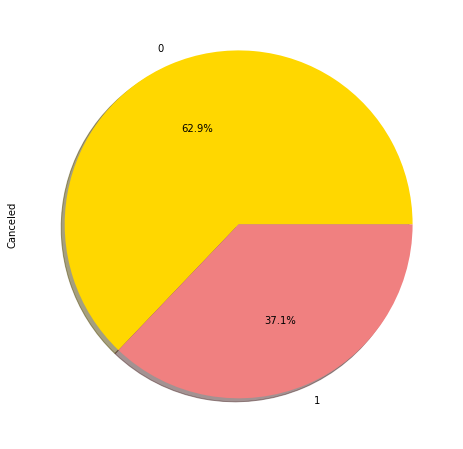

In [70]:
cols = ['gold', 'lightcoral']
hotel['Canceled'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, colors=cols)

根据饼状图，该酒店63%的预订没有被取消，37%的预订被取消。

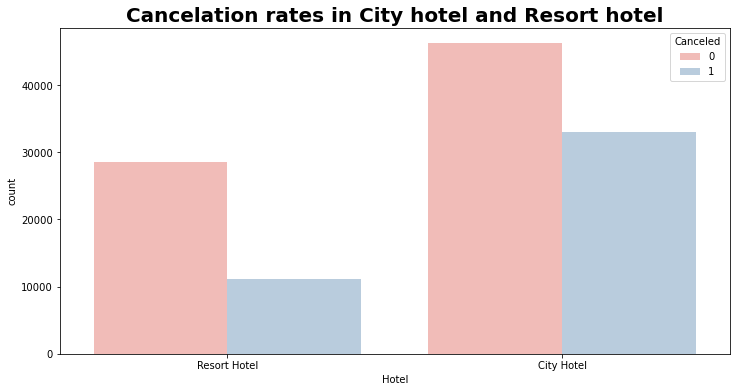

In [71]:
plt.figure(figsize=(12, 6))

sns.countplot(x='Hotel',hue="Canceled", data=hotel,palette='Pastel1')
plt.title("Cancelation rates in City hotel and Resort hotel",fontweight="bold", size=20)
plt.show()

可以发现大部分的预订是在城市旅馆，并且与城市酒店相比，度假酒店取消的次数较少

### 按月和年计算到达人数

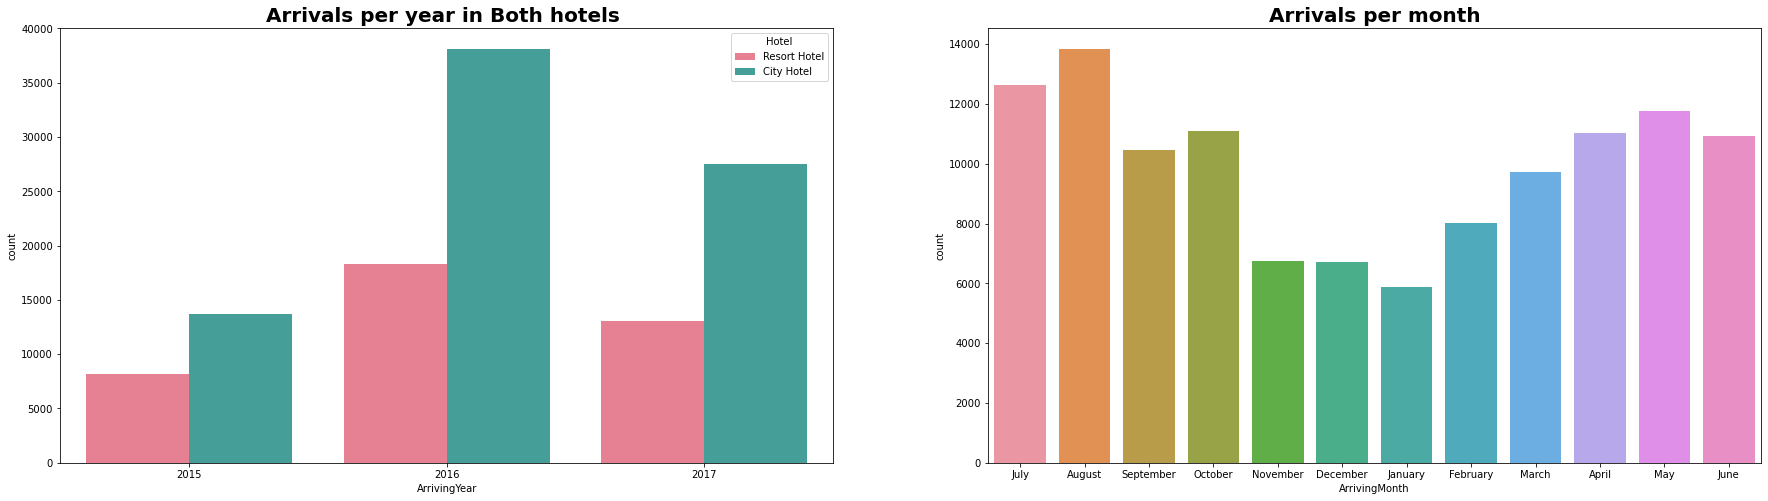

In [72]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='ArrivingYear',hue='Hotel', data=hotel,palette='husl')
plt.title("Arrivals per year in Both hotels ",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = hotel, x = 'ArrivingMonth')
plt.title('Arrivals per month',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

plt.show()


我们可以看到大部分的预订是在2016年，大多数预订是在5月、6月、7月和8月

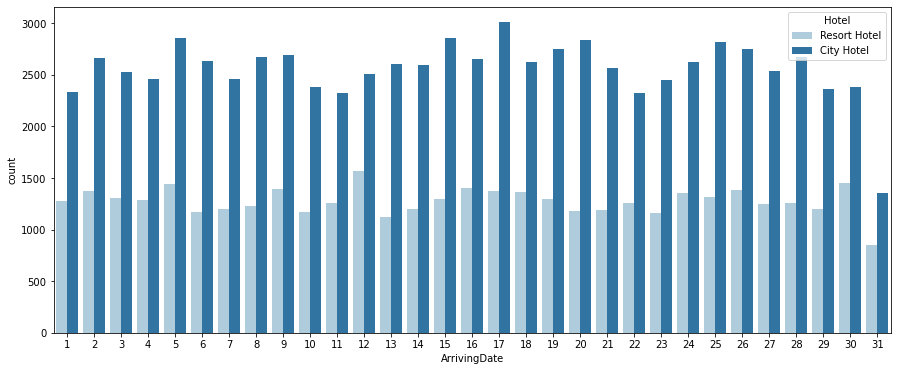

In [74]:
plt.figure(figsize=(15,6))

sns.countplot(data = hotel, x = 'ArrivingDate', hue='Hotel', palette='Paired')
plt.show()

可以发现月底到达的人很少，城市酒店的预订量更多

## 回头客

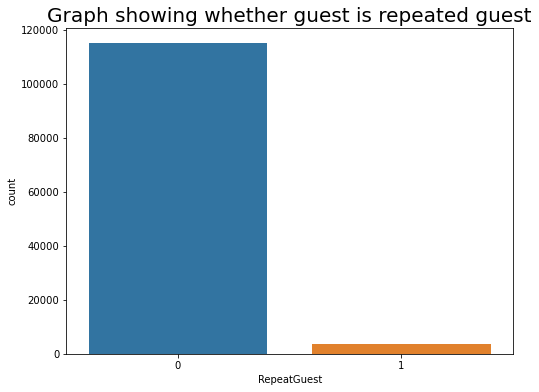

In [75]:
plt.figure(figsize=(8,6))
sns.countplot(data = hotel, x = 'RepeatGuest').set_title('Graph showing whether guest is repeated guest', fontsize = 20)
plt.show()

回头客很少，因为他们之前已经预订过了，所以需要将目标锁定在反复光顾的客人身上